# Deconvelution

lets see what we get

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt
#from statsmodels.stats.weightstats import ttest_ind
%matplotlib inline

#from google.colab import drive
#drive.mount('/content/drive')
data2 = pd.read_csv("E:/Dropbox (UiO)/Validation/All2007x.csv") 

In [40]:
data2.tail()
data= data2
data= data[data['Trial'].isin(['E-MTAB-4439','GSE18728','GSE19697', 'GSE20194', 'GSE20271', 'GSE22093', 'GSE22358', 'GSE42822','GSE22513'])]
#  data= data[data['Trial'].isin(['GSE25066','GSE32603','GSE32646','GSE37946','GSE50948', 'GSE23988'])] 
resp = {'pCR': 1,'RD': 0}
data.Response = [resp[item] for item in data.Response]
er = {'Positive':1,'Negative':0}
data.ER = [er[item] for item in data.ER]
data= data.loc[data['PAM50'] == 'Her2'] 
data.shape
data.to_csv('E:/Dropbox (UiO)/Validation/0Code/PAM50/Her2/fh.csv') 
data.shape


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(107, 43)

# Preprocessing 

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
X= pd.DataFrame(data.drop(['Trial','Mixture',  'Response', 'PAM50', 'RoRRisk', 'RoRScore' ], axis=1))  # data[data.columns[1:29]]  
d3= pd.DataFrame(data.drop(['Trial','Mixture', 'Response', 'PAM50', 'RoRRisk', 'RoRScore' ], axis=1))  # data[data.columns[1:29]]   
y= data['Response']
from sklearn import preprocessing
X = pd.DataFrame(preprocessing.StandardScaler().fit(X).transform(X), columns =d3.columns)
X.shape
X.head()

,B.cells.Memory,B.cells.Naive,CAFs.MSC.iCAF.like,CAFs.myCAF.like,DCs,Endothelial.ACKR1,Endothelial.CXCL12,Endothelial.LYVE1,Endothelial.RGS5,GenMod1,...,T.cells.CD8.,Cancer.Cells,Normal.Epi,TCells,Myeloids,BCells,CAFs,PVLs,Endothelials,ER
0,-0.396546,0.865385,0.701712,1.308330,-0.304444,0.992458,0.887248,-0.181381,-0.384573,-0.744774,...,-0.546467,-1.552879,-0.245158,2.039167,0.281134,0.564300,1.385097,0.792214,0.287958,-0.449719
1,-0.225589,-0.064135,1.258632,0.887080,-0.277515,-0.213570,3.439917,1.570519,-0.007139,1.314690,...,-0.546467,-0.860581,0.129543,0.499326,-0.129315,-0.169565,1.066510,-0.512640,2.302141,-0.449719
2,-0.520641,-0.469882,-0.581827,1.308677,-0.486369,-0.213570,1.379645,-0.544134,-0.401412,0.521451,...,-0.311830,-0.883667,0.624292,0.083267,0.879928,-0.675112,1.176585,-0.332231,0.389121,-0.449719
3,-0.520641,-0.484133,4.593013,0.926668,-0.475011,-0.178959,3.159616,0.459374,-1.013674,-0.495499,...,-0.546467,-1.021729,-0.305366,0.610884,0.476399,-0.687677,1.647512,0.011945,1.132596,-0.449719
4,-0.520641,0.291358,-0.229080,1.925094,-0.101749,-0.213570,3.327899,-0.120066,-0.593560,-0.750432,...,-0.546467,-0.799285,-0.049983,-0.656498,0.165844,-0.003963,1.832773,2.104699,1.473768,-0.449719


#  Test Train

In [42]:
#   Import necessary ML packages
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Split into training/testing datasets using Train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3333,random_state=10)#
 
print ('Train set:', X_train.shape,y_train.shape)
print ('Test set: ', X_test.shape, y_test.shape)

Train set: (71, 37) (71,)
Test set:  (36, 37) (36,)


# Support Vector Machine

In [43]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm

clf = svm.SVC(C=4,gamma=0.065,kernel='rbf',probability=True, class_weight='balanced')  # 
cv = KFold(n_splits=5, random_state=1, shuffle=True) 
model = clf #svm.SVC(C=1,kernel='linear',probability=True) 
Acc_score = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
f1_score = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(Acc_score)*100, std(Acc_score)*100))
print('f1 score: %.3f (%.3f)' % (mean(f1_score), std(f1_score)))

Accuracy: 58.052 (9.371)
f1 score: 0.428 (0.160)


In [44]:
X_train, y_train = X,y 
X_test, y_test = X,y
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

clf = svm.SVC(C=4,gamma=0.065,kernel='rbf',probability=True, class_weight='balanced')  # 

clf.fit(X_train,y_train)

yhatSVM = clf.predict(X_test)

svmaccu = accuracy_score(y_test, yhatSVM)
svmf1 = f1_score (y_test, yhatSVM)
print("Support Vector Machines are ", svmaccu*100, "accurate")
print("SVM  f1 score is", svmf1)

Support Vector Machines are  98.13084112149532 accurate
SVM  f1 score is 0.9782608695652174


 # SHAP Analysis

In [45]:
!pip install shap
import shap

In [46]:
svm_explainer = shap.KernelExplainer(clf.predict,X)
svm_shap_values = svm_explainer.shap_values(X_test)

X does not have valid feature names, but SVC was fitted with feature names
Using 107 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/107 [00:00<?, ?it/s]X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set p

In [47]:
svm_shap= pd.DataFrame(svm_shap_values,columns=d3.columns)
svm_shap.to_csv('E:/Dropbox (UiO)/Validation/0Code/PAM50/Her2/SHAP FHalf.csv') 

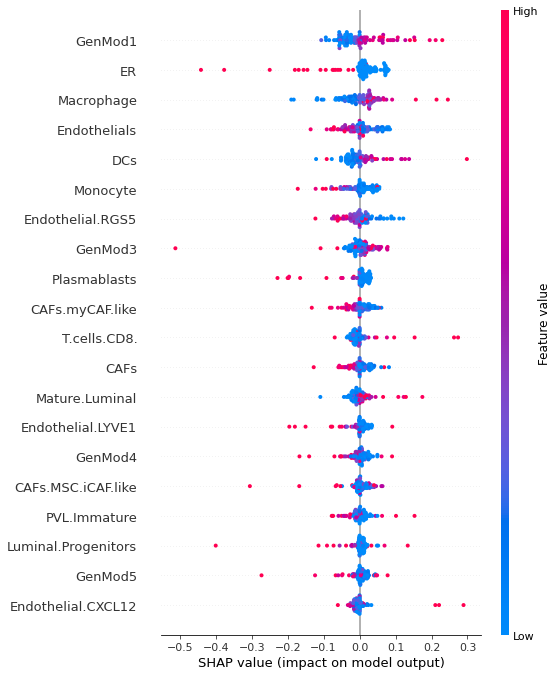

In [48]:
shap.summary_plot(svm_shap_values, X_test,feature_names=d3.columns)

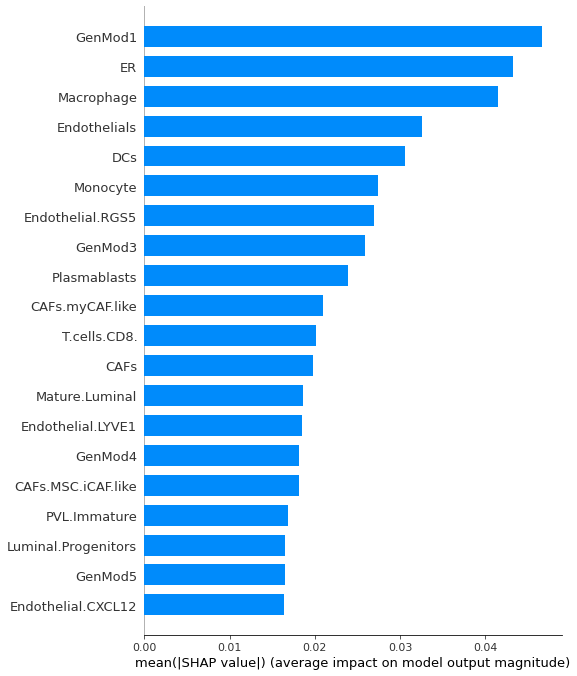

In [49]:
shap.summary_plot(svm_shap_values, X_test, feature_names=d3.columns, plot_type="bar")

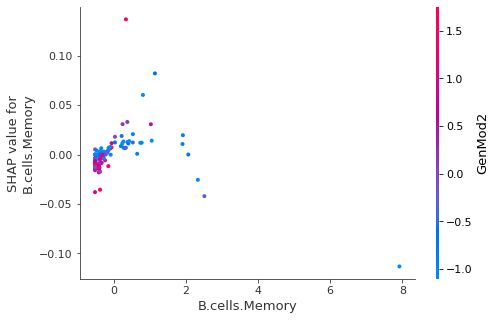

In [50]:
shap.dependence_plot(0, svm_shap_values,X_test, feature_names=d3.columns)